In [1]:
%%capture
import qiskit as q 
import numpy as np
import matplotlib.pyplot as plt

"""
we begin by importing the assorted libraries we need,
qiskit for the actual hello world circuit
numpy and matplot for plotting

forgive me for my lazy importing...

"""

In [2]:
#set up the qiskit back end
#no shots here, let's just grab the whole state
backend = q.BasicAer.get_backend('statevector_simulator')

In [3]:
circ = q.QuantumCircuit(8)
circ = circ.from_qasm_file('./qiskit_circuit')
circ.qasm()
#set up the circuit and import the canonical hello world circuit.
#in the output we view the 1400-ish canonical QASM commands 

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[8];\nu3(1.3655558,0,0) q[7];\nu1(0.14726216) q[7];\ncx q[7],q[6];\nu3(-0.17612555,0,0) q[6];\ncx q[7],q[6];\nu3(1.4954208,0,0) q[6];\ncx q[7],q[6];\nu1(-pi/64) q[6];\ncx q[7],q[6];\nu1(-0.14726216) q[6];\ncx q[7],q[5];\nu3(0.0020713604,0,0) q[5];\ncx q[6],q[5];\nu3(0.0023318517,0,0) q[5];\ncx q[6],q[5];\ncx q[7],q[5];\ncx q[6],q[5];\nu3(0.13742302,0,0) q[5];\ncx q[6],q[5];\nu3(1.52772,0,0) q[5];\ncx q[7],q[5];\nu1(pi/64) q[5];\ncx q[6],q[5];\nu1(-pi/64) q[5];\ncx q[6],q[5];\ncx q[7],q[5];\ncx q[6],q[5];\nu1(-0.14726216) q[5];\ncx q[6],q[5];\nu1(pi/64) q[5];\ncx q[7],q[4];\nu3(-0.16364563,0,0) q[4];\ncx q[5],q[4];\nu3(0.16096432,0,0) q[4];\ncx q[5],q[4];\ncx q[6],q[4];\ncx q[5],q[4];\nu3(-0.008235858,0,0) q[4];\ncx q[5],q[4];\nu3(0.12307104,0,0) q[4];\ncx q[6],q[4];\ncx q[7],q[4];\ncx q[6],q[4];\nu3(0.076601948,0,0) q[4];\ncx q[5],q[4];\nu3(-0.13720709,0,0) q[4];\ncx q[5],q[4];\ncx q[6],q[4];\ncx q[5],q[4];\nu3(0.046548628,0,0) q[4];\ncx q[5

In [4]:
#run the above circuit
job = q.execute(circ, backend)

In [9]:
#grab the sate vector from the circuit run
final_state = job.result().get_statevector()

In [10]:
"""
Here we are! We did it! Hello world. 

"""
final_state

array([ 0.06372567+0.00000000e+00j,  0.17397985-3.86923767e-09j,
        0.08497814+1.18137548e-10j,  0.05393829-1.73472348e-17j,
       -0.04501512+1.19751701e-09j,  0.05145129-3.11882417e-10j,
        0.04662671+2.43034252e-10j, -0.11085424+2.38407341e-09j,
        0.0519748 -1.65357254e-09j, -0.0244676 +3.23097160e-10j,
        0.08334244+9.39606212e-10j, -0.07536526+6.34382875e-10j,
        0.07715316-1.48649504e-09j, -0.00367707+1.78461554e-10j,
       -0.01579734+2.99490528e-10j, -0.09312708+1.39876823e-09j,
        0.08306602-6.09351226e-10j,  0.01496403-3.79016532e-10j,
        0.00611282-1.70404725e-10j,  0.04538994+6.31016107e-11j,
       -0.11201753+2.06307653e-09j,  0.03857249-1.47429067e-10j,
        0.02570558-3.27500306e-11j,  0.11300134+3.01064321e-10j,
       -0.09536093+4.50671662e-09j, -0.0380774 +7.82142077e-10j,
        0.03653935-8.74689892e-10j,  0.06364907-1.93650269e-09j,
        0.07888987-1.34327614e-09j, -0.09140085+2.55856236e-09j,
        0.05644544-6.9086

/home/jamie/.local/lib/python3.6/site-packages/qiskit/tools/qi/qi.py:78: DeprecationWarning: This function is deprecated and will be removed in the future. It is superseded by the `quantum_info.partial_trace` function
  DeprecationWarning)


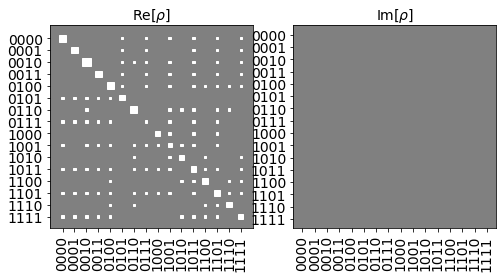

In [11]:
"""
Let's just look at the sub-system of just the first 4-qubits.

Finally!! Here it is!

I'm using tools instead of quantum_info because tools return an array that visualization will work with. 

"""
reduced_state = q.tools.partial_trace(final_state, (0,1,2,3))

q.visualization.plot_state_hinton(reduced_state)

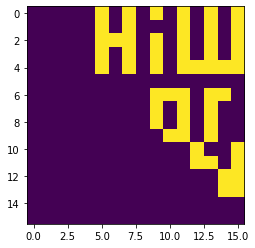

In [12]:
"""
This is much easier on a classical computer...

Okay, let's now zoom in on those off-diagonal coherence terms.

"""

plt.imshow( np.triu(np.real(reduced_state), 1) )
plt.show()

In [13]:
%%capture
"""
Okay... it's not "Hello World", it's Hi World". But it's there, sort of...

Woo! Congratulations to us, we just made our first Hello World-ish qiskit program

"""